In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
import graspologic as gl

/Users/thomasathey/Documents/shavit-lab/celegans/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get the current working directory
path = Path.cwd()
path_syncounts = path / "data" / "41586_2021_3778_MOESM4_ESM.xlsx"

# Format matrix of adult connectome
Rows are post synaptic, columns are pre

In [24]:
# read in the data
df = pd.read_excel(path_syncounts, sheet_name="Dataset8", header=2)
# remove first row
df = df.iloc[1:]
# remove the first column
df = df.iloc[:,1:]

#name the first column "neuron type"
df.columns = ["neuron type"] + list(df.columns[1:])
# name the second column "neuron name"
df = df.rename(columns={df.columns[1]: "neuron name"})

# if neuron type is nan, copy the previous neuron type
df["neuron type"] = df["neuron type"].fillna(method='ffill')

/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_51226/3054718489.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["neuron type"] = df["neuron type"].fillna(method='ffill')


In [38]:
# assert that all neuron names are unique
row_names = df["neuron name"]
col_names = df.columns[2:]

assert row_names.nunique() == len(row_names)
assert col_names.nunique() == len(col_names)



In [39]:
df

,neuron type,neuron name,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,ALML,ALMR,...,PVNL,PVNR,PVQL,PVQR,RICL,RICR,RID,RIS,RMGL,RMGR
1,Sensory,ADFL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sensory,ADFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sensory,ADLL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sensory,ADLR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Sensory,AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Other,GLRDR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,Other,GLRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,Other,GLRR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,Other,GLRVL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Networkx object

In [59]:
G = nx.DiGraph()

# add edges
for i, row in df.iterrows():
    # iterate through the entries of row
    post = row["neuron name"]
    for pre, val in row.items():
        if pre not in ["neuron type", "neuron name"] and val > 0:
            G.add_edge(pre, post, weight=val)
    


# add neuron types
for i, row in df.iterrows():
    neuron_name = row["neuron name"]
    neuron_type = row["neuron type"]
    # if neuron name is not in the graph, add it
    if neuron_name not in G.nodes:
        G.add_node(neuron_name)
    G.nodes[neuron_name]["neuron type"] = neuron_type
    

# graspologic plotting

In [64]:
# remove all nodes that have neuron type equal to Muscle\
muscle_nodes = [n for n in G.nodes if G.nodes[n]["neuron type"] == "Muscle"]
G.remove_nodes_from(muscle_nodes)

A = nx.adjacency_matrix(G).todense()
neuron_types = [G.nodes[n]["neuron type"] for n in G.nodes]

<Axes: >

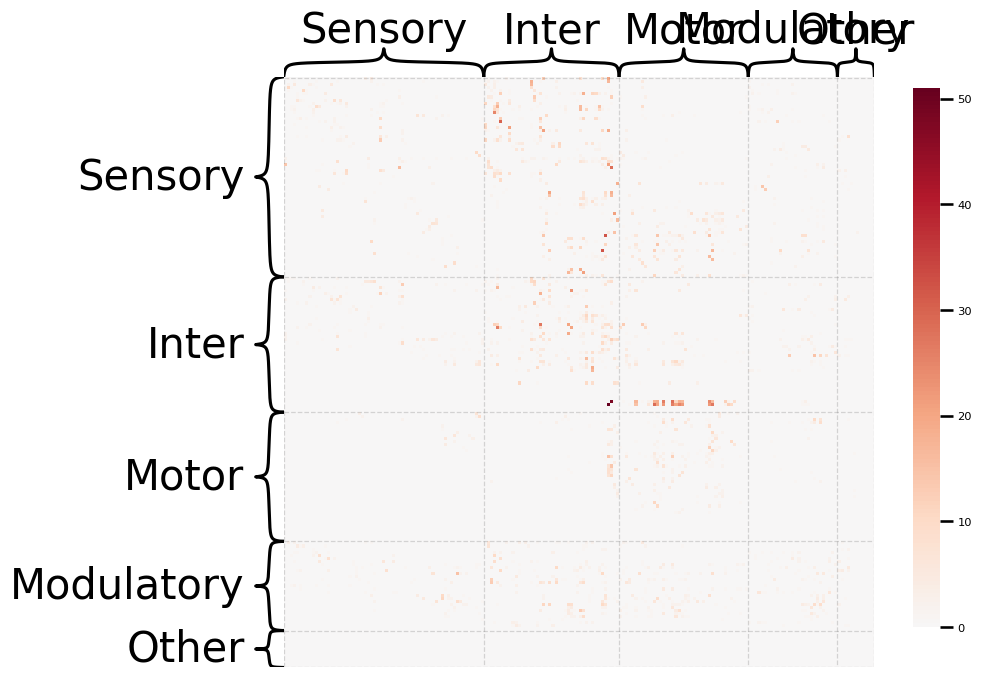

In [66]:
gl.plot.heatmap(A, inner_hier_labels=neuron_types, font_scale=0.5)
